#  Exploratory Data Analysis of the USA Vehicle Market

## Introduction

The analysis of the USA vehicle Market aims to provide insights into the characteristics and trends of vehicles in the United States automotive market. This dataset contains information about various attributes of vehicles, including make, model, year, price, mileage, condition, and other relevant features. By examining this dataset, we seek to uncover patterns, relationships, and key factors that influence vehicle pricing, popularity, and market demand.

### Import the necessary libraries

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

### Read the Dataset

In [3]:
df = pd.read_csv('../vehicles_us.csv')

### Show the first 10 records of the dataset

In [4]:
df.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


### Show the last 10 records of the dataset

In [5]:
df.tail(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
51515,12000,2005.0,chevrolet silverado 2500hd,good,8.0,diesel,228000.0,automatic,pickup,silver,1.0,2018-08-18,52
51516,8999,2011.0,jeep grand cherokee,good,6.0,gas,NaN,automatic,SUV,white,1.0,2018-11-01,51
51517,11000,2012.0,dodge charger,excellent,8.0,gas,81000.0,automatic,sedan,black,NaN,2019-04-19,44
51518,3750,2005.0,ford taurus,excellent,6.0,gas,110200.0,automatic,sedan,silver,NaN,2018-08-10,63
51519,11750,2015.0,honda accord,excellent,4.0,gas,NaN,automatic,coupe,NaN,NaN,2018-11-24,89
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,NaN,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,NaN,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,NaN,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,NaN,2018-07-02,71
51524,6300,2014.0,nissan altima,good,4.0,gas,NaN,automatic,sedan,NaN,NaN,2018-06-05,10


### Dimension of the `vehicles` dataframe

In [6]:
df.shape

(51525, 13)

### Checking Data Type

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


### Checking Missing Values

In [8]:
# Total numer of missing values in each column
missing_values_count = df.isnull().sum()

In [9]:
print(missing_values_count)

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64


In [10]:
total_missing_values = missing_values_count.sum()
print("\nTotal number of missing values in the dataframe:", total_missing_values)


Total number of missing values in the dataframe: 51991


**There are 5 columns with missing values with a total of 51991**

### Missing Values Manipulation

#### Replacing 'model year' and 'cylinders' missing values by Groupby Method

##### * Model Year

In [11]:
# Define a function to fill missing values with the mode of each group
def fill_missing_with_group_mode(series):
    return series.fillna(series.mode().iloc[0])

In [12]:
# Group by 'model' and fill missing values in 'model_year' column with group mode
df['model_year'] = df.groupby(['model'])['model_year'].transform(fill_missing_with_group_mode)
print(df["model_year"].head())

0    2011.0
1    2013.0
2    2013.0
3    2003.0
4    2017.0
Name: model_year, dtype: float64


##### * Cylinders

In [13]:
# Define a function to fill missing values with the median of each group
def fill_missing_with_group_median(series):
    return series.fillna(series.median())

In [14]:
# Group by 'model' and 'model_year' and fill missing values in 'cylinders' column with group median
df['cylinders'] = df.groupby(['model', 'model_year'])['cylinders'].transform(fill_missing_with_group_median)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out

#### Dropping 'odometer', 'paint_color', 'is_4wd' columns

In [15]:
df = df.drop(['odometer', 'paint_color','is_4wd'], axis=1)

##### Checking Missing values again

In [16]:
missing_values_count1 = df.isnull().sum()
print(missing_values_count1)

price            0
model_year       0
model            0
condition        0
cylinders       26
fuel             0
transmission     0
type             0
date_posted      0
days_listed      0
dtype: int64


In [17]:
df= df.dropna()
df.shape

(51499, 10)

### Brand Popularity

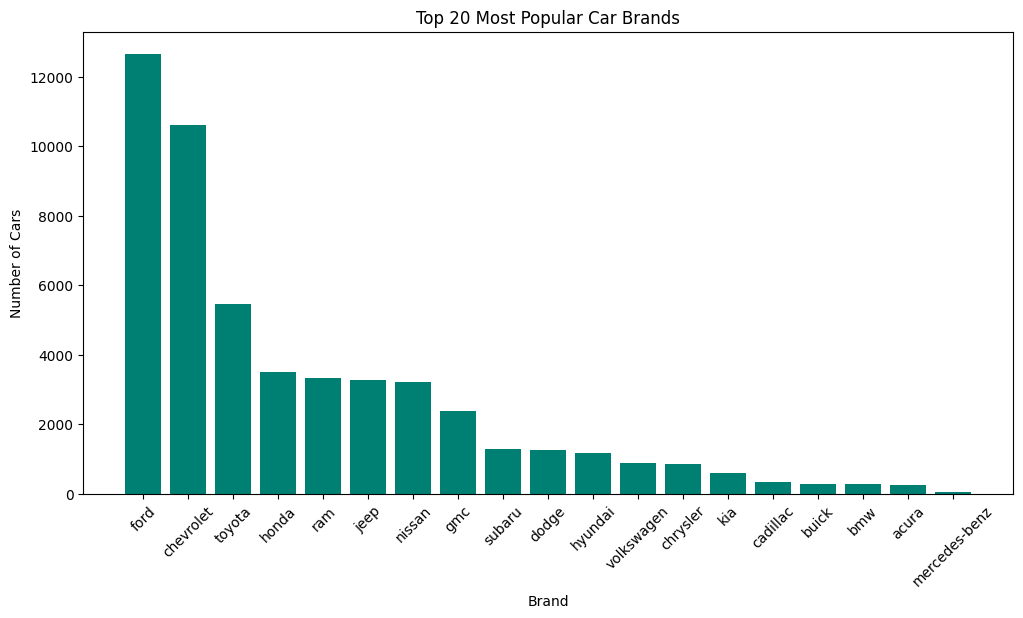

In [18]:
# Creating a new column 'manufacturer' from the model column
df['manufacturer'] = df['model'].str.split(' ').str[0]
# Counting the number of each manufacter 
brand_counts = df['manufacturer'].value_counts()
# Plotting the 20 most popular manufacturer
top_brands = brand_counts.head(20)
plt.figure(figsize=(12, 6))
plt.bar(top_brands.index, top_brands.values, color='#007F73')
plt.xlabel('Brand')
plt.ylabel('Number of Cars')
plt.title('Top 20 Most Popular Car Brands')
plt.xticks(rotation=45)
plt.show()

**- The most popular brand car is Ford, following by Chevrolet, and Toyota**

**- BMW, Acura, and Mercedes-Benz are the least popular**

### Brand Price

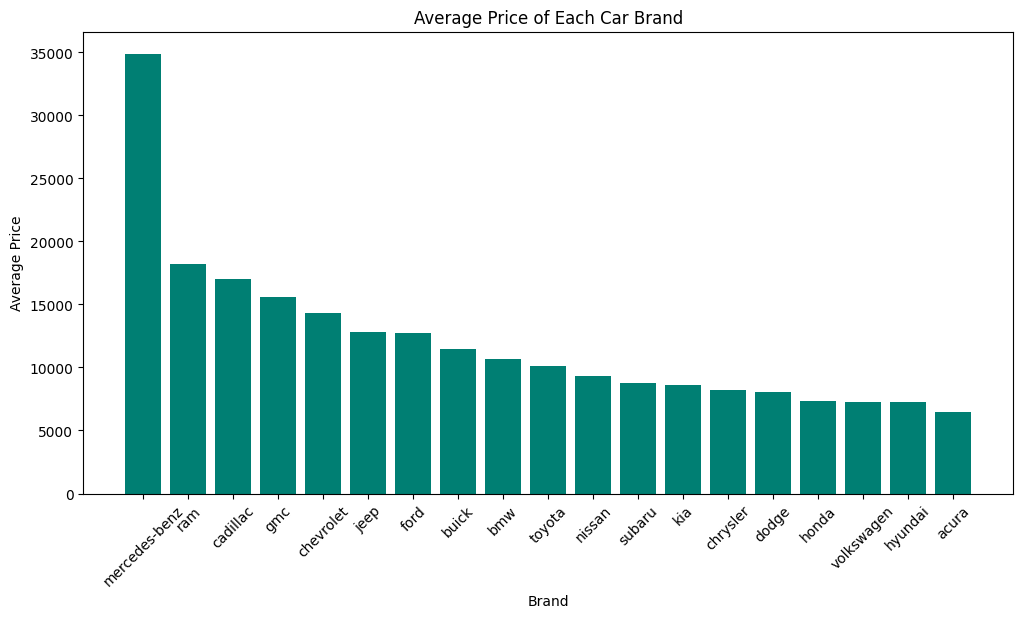

In [19]:
# Calculate the mean price for each brand
brand_avg_price = df.groupby('manufacturer')['price'].mean().sort_values(ascending=False)

# Plot the average price for each brand
plt.figure(figsize=(12, 6))
plt.bar(brand_avg_price.index, brand_avg_price.values, color='#007F73')
plt.xlabel('Brand')
plt.ylabel('Average Price')
plt.title('Average Price of Each Car Brand')
plt.xticks(rotation=45)
plt.show()

**- Mercedes-Benz, Ram, and Cadillac stand out as the most expensive car brands**

**- Acura, Hyundai and Volkswagen are the least expensive on average**

### Days Listed Analysis

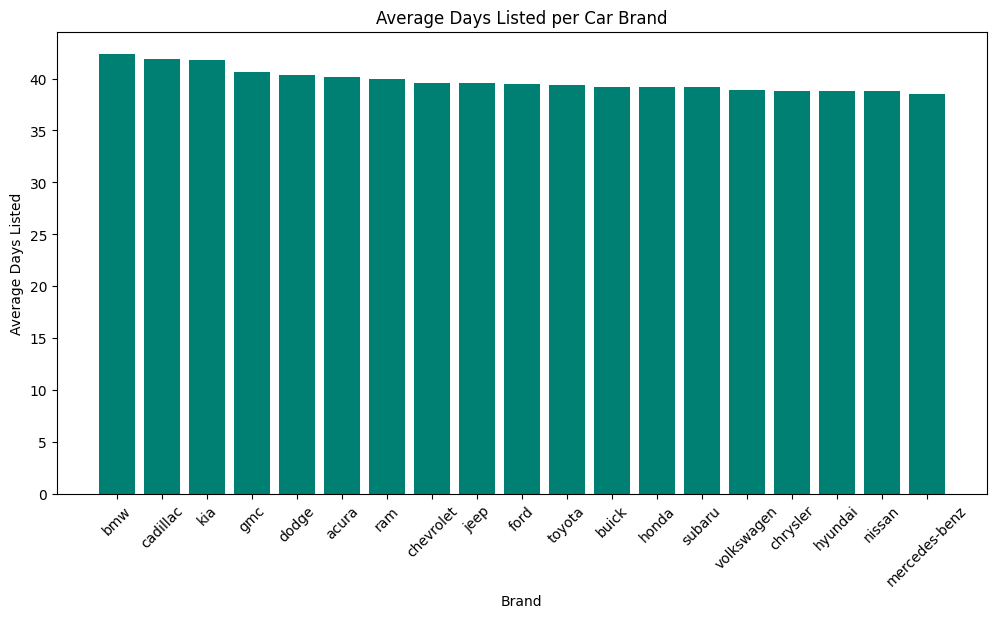

In [20]:
# Calculate the average days listed for each brand
brand_avg_days_listed = df.groupby('manufacturer')['days_listed'].mean().sort_values(ascending=False)

# Plot the average days listed for each brand
plt.figure(figsize=(12, 6))
plt.bar(brand_avg_days_listed.index, brand_avg_days_listed.values, color='#007F73')
plt.xlabel('Brand')
plt.ylabel('Average Days Listed')
plt.title('Average Days Listed per Car Brand')
plt.xticks(rotation=45)
plt.show()

**- BMW, Cadillac, and Kia are the brands that stay listed longer**

**- Mercedes-Benz, Nissan, and Hyundai are the brands listed shorter**

/var/folders/1l/nbw_db6x2rd8s9znb0vfd7qw0000gn/T/ipykernel_86741/384084717.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_days_listed_per_price_range = df.groupby('price_range')['days_listed'].mean().sort_values(ascending=False)


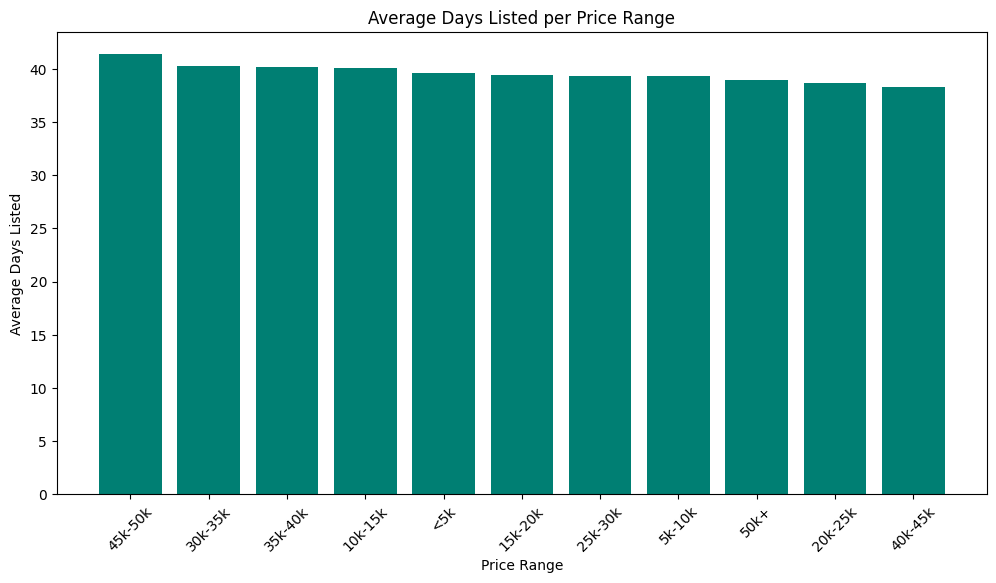

In [21]:
# Define the price ranges
price_ranges = [0, 5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000, 45000, 50000, float('inf')]
labels = ['<5k', '5k-10k', '10k-15k', '15k-20k', '20k-25k', '25k-30k', '30k-35k', '35k-40k', '40k-45k', '45k-50k', '50k+']

# Create a new column for price range
df['price_range'] = pd.cut(df['price'], bins=price_ranges, labels=labels, right=False)

# Calculate the average days listed per price range
avg_days_listed_per_price_range = df.groupby('price_range')['days_listed'].mean().sort_values(ascending=False)

# Plot the average days listed per price range
plt.figure(figsize=(12, 6))
plt.bar(avg_days_listed_per_price_range.index, avg_days_listed_per_price_range.values, color='#007F73')
plt.xlabel('Price Range')
plt.ylabel('Average Days Listed')
plt.title('Average Days Listed per Price Range')
plt.xticks(rotation=45)
plt.show()


**- The vehicles per price range longer listed are 45k-50k, 30k-35k, and 35k-40k**

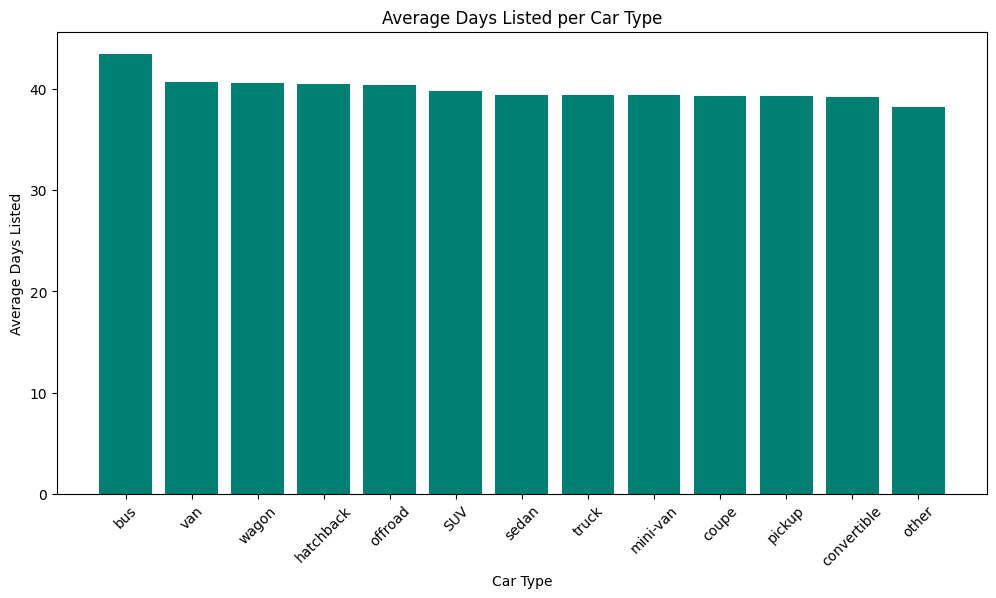

In [22]:
# Calculate the average days listed per car type
avg_days_listed_per_type = df.groupby('type')['days_listed'].mean().sort_values(ascending=False)
# Plot the average days listed per car type
plt.figure(figsize=(12, 6))
plt.bar(avg_days_listed_per_type.index, avg_days_listed_per_type.values, color='#007F73')
plt.xlabel('Car Type')
plt.ylabel('Average Days Listed')
plt.title('Average Days Listed per Car Type')
plt.xticks(rotation=45)
plt.show()

**- Bus, Van, and Wagon are the car types that stay listed longer while convertible, pickup, and coupe are listed shorter**

### Price Analysis

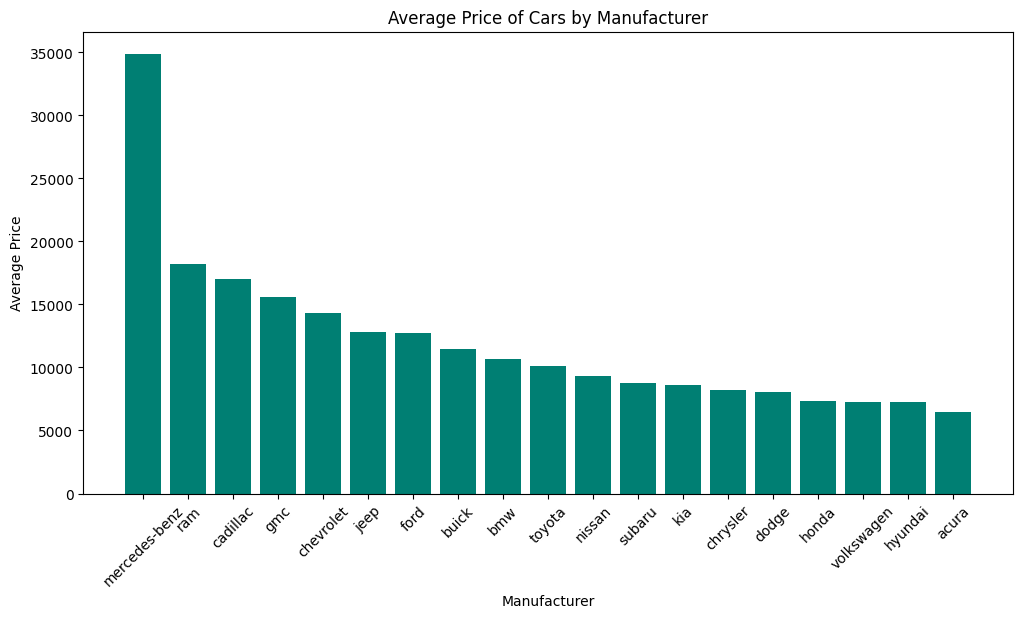

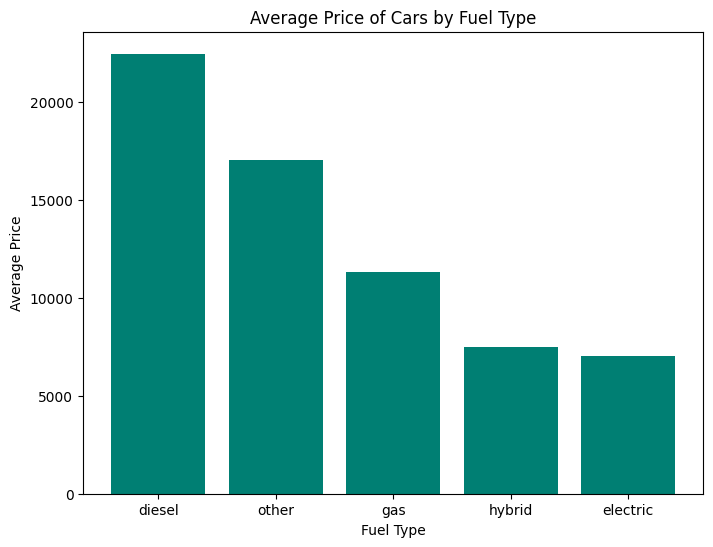

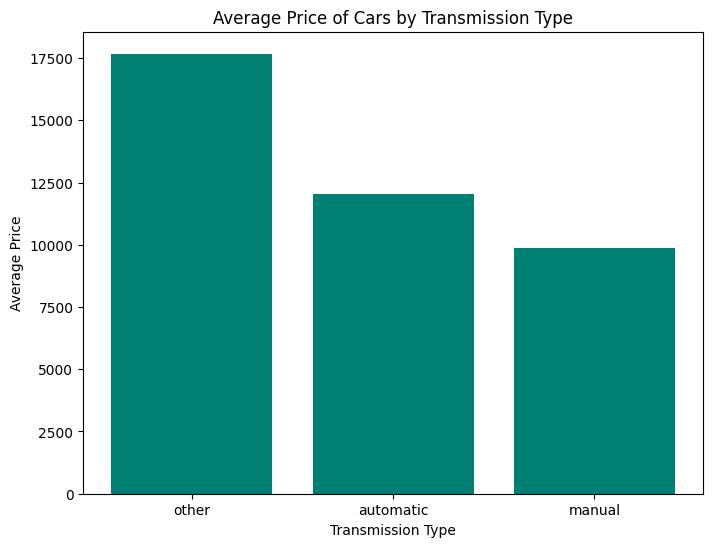

In [23]:
# Price analysis by manufacturer
manufacturer_prices = df.groupby('manufacturer')['price'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
plt.bar(manufacturer_prices.index, manufacturer_prices.values, color="#007F73")
plt.title('Average Price of Cars by Manufacturer')
plt.xlabel('Manufacturer')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

# Price analysis by fuel type
fuel_prices = df.groupby('fuel')['price'].mean().sort_values(ascending=False)
plt.figure(figsize=(8, 6))
plt.bar(fuel_prices.index, fuel_prices.values, color="#007F73")
plt.title('Average Price of Cars by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Average Price')
plt.show()

# Price analysis by transmission type
transmission_prices = df.groupby('transmission')['price'].mean().sort_values(ascending=False)
plt.figure(figsize=(8, 6))
plt.bar(transmission_prices.index, transmission_prices.values, color="#007F73")
plt.title('Average Price of Cars by Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Average Price')
plt.show()

#### Average Price of Cars by Manufacturer

Overall the top 3 most expensive car brands are Mercedez Benz, Ram and Cadillac

#### Average Price of Cars by Fuel Type

The most expesive cars by fuel are diesel type

#### Average Price of Cars by Transmission Type

The Most expensive transmission type is other, within this type there are sequential, tiptronic, etc. Technologies known to be more expensive than automatic and manual.



### Relation between model year and price

([<matplotlib.axis.YTick at 0x12c324c80>,
 [Text(0, 0, '0'),
  Text(0, 10000, '10000'),
  Text(0, 20000, '20000'),
  Text(0, 30000, '30000'),
  Text(0, 40000, '40000'),
  Text(0, 50000, '50000'),
  Text(0, 60000, '60000'),
  Text(0, 70000, '70000'),
  Text(0, 80000, '80000'),
  Text(0, 90000, '90000'),
  Text(0, 100000, '100000')])

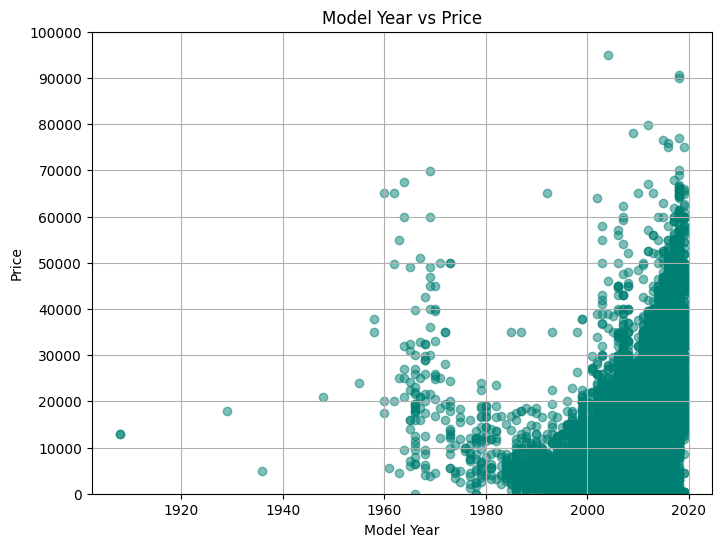

In [25]:
# Filter the DataFrame to include only price values <= 100000
df_filtered = df[df['price'] <= 100000]

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df_filtered['model_year'], df_filtered['price'], alpha=0.5, color="#007F73")
plt.title('Model Year vs Price')
plt.xlabel('Model Year')
plt.ylabel('Price')
plt.grid(True)

# Set y-axis range and tick interval
plt.ylim(0, 100000)
plt.yticks(range(0, 100001, 10000))



### Relation between the year and price

As we can see in the chart, for the vast majority of them the recent the model year, the higher the price, also we can see some values out of the standard, it must be studied deeply to figure it out what are the real reasons, but my hypothesis about that is that the values out of the common are well preserved vehicles, classic cars, etc.

## 

## Conclusion


Based on the analysis carried out with the USA vehicle market dataset, several key insights can be drawn:

1- Ford, Chevrolet, and Toyota are the most popular car brands, while BMW, Acura, and Mercedes-Benz are the least popular. <br><br>
2- Mercedes-Benz, Ram, and Cadillac are among the most expensive car brands, while Acura, Hyundai, and Volkswagen are among the least expensive.<br><br>
3- BMW, Cadillac, and Kia are the brands with the longest average listing durations, while Mercedes-Benz, Nissan, and Hyundai have shorter listing durations.<br><br>
4- The price ranges of 45k-50k, 30k-35k, and 35k-40k have vehicles listed for the longest durations.<br><br>
5- Bus, Van, and Wagon are car types that stay listed longer, while Convertible, Pickup, and Coupe are listed for shorter durations.<br><br>

In general, the data suggests that certain brands, price ranges, and car types have distinct market characteristics and behaviors in the USA vehicle market.